<a href="https://colab.research.google.com/github/SantiagoArce7/CIENCIA_DATOS_2025/blob/main/Clase_4_Medidad_de_tendencia_central_Variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AGENDA
1. Definir conceptos
2. Cargar datos desde drive
3. Cálculo de la desviación estándar
4. Exploración de distribución de datos (gráficos)

##1. Definición de conceptos
1.1 Varianza:
Es una medida estadística que cuantifica la dispersión de un conjunto de datos con respecto a su valor medio.

---

1.2 Desviación Estandar:
Se utiliza para calcular la variación o dispersión en la que los puntos de datos individuales difieren de la media

---

1.3 Desviación de la media absoluta:
Es una medida de variabilidad que indica la distancia promedio entre las observaciones y su media.

---

1.4 Desviación absoluta mediana de la mediana:
Es una medida robusta de la dispersión de los datos, que se calcula encontrando la mediana de las desviaciones absolutas de la mediana

---

1.5 Rango:
Valor numérico que sirve para manifestar la diferencia entre el valor máximo y el valor mínimo de una muestra poblacional en Estadística

---

1.6 Estadistica ordinal: Dato o variable que clasifica las observaciones en categorías ordenadas

---

1.7 Percentil: Valor estadístico que divide un conjunto de datos ordenados en 100 partes iguales, indicando el porcentaje de observaciones que se encuentran por debajo de dicho valor

---

1.8 Rango intercuartil: Medida de dispersión que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [13]:
!pip install wquantiles
!pip install statsmodels

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import wquantiles

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [73]:
data=pd.read_csv('/content/drive/MyDrive/MOCK_DATA.csv')
data.head()

,country,year,gender,age_group,suicide_rate,population,gdp_per_capita,unemployment_rate,mental_health_services_access,risk_factors
0,Indonesia,2009,Female,30-44,11.78,76,64,50.60,high,trauma
1,Portugal,2021,Female,30-44,94.11,21,2,86.36,high,poverty
2,China,2001,Male,45-59,53.45,35,52,26.52,high,mental illness
3,China,2010,Male,30-44,96.03,28,49,5.52,medium,poverty
4,Indonesia,1972,Female,60+,79.63,59,95,77.84,medium,trauma


In [85]:
data=data.rename(columns={"country":"pais","year":"año","gender":"genero","age_group":"grupo_edad","suicide_rate":"tasa_suicidio","population":"poblacion","gdp_per_capita":"pib_per_capita","unemployment_rate":"tasa_desempleo","mental_health_services_access":"salud_mental_acceso_servicios","risk_factors":"factores_riesgo"})
data

,pais,año,genero,grupo_edad,tasa_suicidio,poblacion,pib_per_capita,tasa_desempleo,salud_mental_acceso_servicios,factores_riesgo
0,Indonesia,2009,Female,30-44,11.78,76,64,50.60,high,trauma
1,Portugal,2021,Female,30-44,94.11,21,2,86.36,high,poverty
2,China,2001,Male,45-59,53.45,35,52,26.52,high,mental illness
3,China,2010,Male,30-44,96.03,28,49,5.52,medium,poverty
4,Indonesia,1972,Female,60+,79.63,59,95,77.84,medium,trauma
...,...,...,...,...,...,...,...,...,...,...
995,Indonesia,2021,Bigender,60+,85.93,55,87,63.51,medium,trauma
996,Brazil,2007,Male,30-44,97.32,53,90,58.36,low,mental illness
997,Brazil,2019,Male,45-59,21.85,38,44,49.52,low,mental illness
998,Greece,1991,Female,15-29,64.64,83,85,11.74,high,poverty


In [88]:
mayor_poblacion=data.groupby( ['poblacion'])["pais"].max()
mayor_poblacion

,pais
poblacion,
1,United States
2,Thailand
3,Ukraine
4,Yemen
5,Poland
...,...
96,Sweden
97,Venezuela
98,Russia


In [87]:
data.describe()

,año,tasa_suicidio,poblacion,pib_per_capita,tasa_desempleo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1996.154000,50.751730,50.258000,51.533000,49.615980
std,15.046551,29.296828,28.641365,30.159418,29.324742
min,1970.000000,0.010000,1.000000,1.000000,0.470000
25%,1983.750000,24.430000,26.750000,26.000000,23.682500
50%,1996.000000,51.155000,51.000000,50.000000,48.880000
75%,2009.000000,77.010000,74.000000,80.000000,74.982500
max,2021.000000,99.910000,100.000000,100.000000,99.900000


In [89]:
#Calculando la desvest y cuantiles
data["poblacion"].std()

28.641364558340523

In [90]:
data["tasa_suicidio"].std()

29.29682776725704

In [91]:
#IQR
data["poblacion"].quantile(0.75)-data["poblacion"].quantile(0.25)

np.float64(47.25)

In [92]:
robust.scale.mad(data["poblacion"])

np.float64(35.58245324413445)

In [93]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["tasa_suicidio"])

np.float64(39.059155446530085)

##4. EXPLORACIÓN EN LA DISTRIBUCIÓN DE DATOS
4.1 dIAGRAMDE CAJAS
4.2 Diagrama de frecuencias
4.3 Histograma
4.4 diagrama de densidad

###4.1 Diagrama de caja

In [94]:
data["tasa_suicidio"].quantile([0.05,0.25,0.5,0.75,0.95])

,tasa_suicidio
0.05,6.073
0.25,24.430
0.50,51.155
0.75,77.010
0.95,94.478


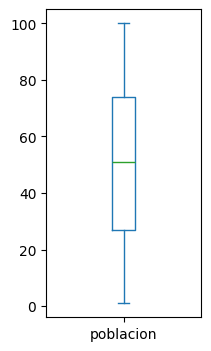

In [100]:
#gRAFIACA DE DIAGRAMA DE CAJA
ax=(data.poblacion).plot.box(figsize=(2,4))
ax.set_label("Población en millones")
##Explicación: de toda la poblacion la media de la tasa de suicidios en los paises, en los distintos años, generos y otros factores de del 50%

In [101]:
#Calculando talba de francuencia e histograma
binnedpoblacion=pd.cut(data["poblacion"],10)
binnedpoblacion.value_counts()

,count
poblacion,
"(50.5, 60.4]",121
"(60.4, 70.3]",109
"(30.7, 40.6]",105
"(90.1, 100.0]",103
"(10.9, 20.8]",100
"(0.901, 10.9]",100
"(80.2, 90.1]",97
"(20.8, 30.7]",94
"(40.6, 50.5]",91


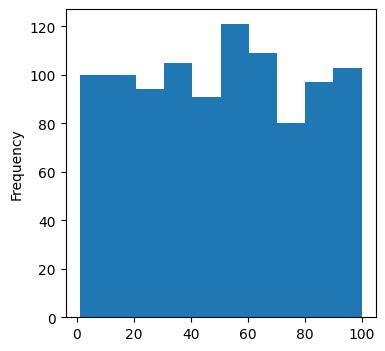

In [102]:
ax=(data.poblacion).plot.hist(figsize=(4,4))
ax.set_label("Población en millones")

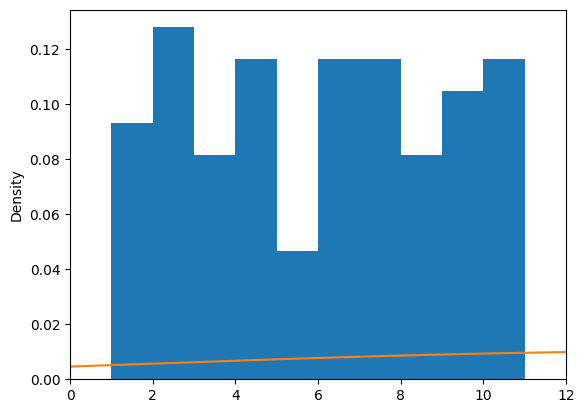

In [108]:
#Diagrama de dispersión y curva de densidad
ax=data["tasa_suicidio"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data["tasa_suicidio"].plot.density(ax=ax)
ax.set_label("Tasa de suicidio por cada millon de habitantes")